To start with, we'll be needing the dataframes containing the values of each state. I've edited the previous program to save them in csv format, so they can be loaded again in this stage of the project.

In [1]:
# importing some necessary libraries and some of the data we'll be using at the start.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import describe
from scipy.stats import poisson
from scipy.stats import linregress

nc_cases = np.loadtxt("Data/nc_cases.csv").astype(int)
ga_cases = np.loadtxt("Data/ga_cases.csv").astype(int)
mi_cases = np.loadtxt("Data/mi_cases.csv").astype(int)
nj_cases = np.loadtxt("Data/nj_cases.csv").astype(int)
va_cases = np.loadtxt("Data/va_cases.csv").astype(int)
wi_cases = np.loadtxt("Data/wi_cases.csv").astype(int)
nc_deaths = np.loadtxt("Data/nc_deaths.csv").astype(int)
ga_deaths = np.loadtxt("Data/ga_deaths.csv").astype(int)
mi_deaths = np.loadtxt("Data/mi_deaths.csv").astype(int)
nj_deaths = np.loadtxt("Data/nj_deaths.csv").astype(int)
va_deaths = np.loadtxt("Data/va_deaths.csv").astype(int)
wi_deaths = np.loadtxt("Data/wi_deaths.csv").astype(int)

# Use the state data (the state of your choice) generated in Stage II to fit a distribution to the number of COVID-19 cases. (25 points)

## Graphically plot the distribution and describe the distribution statistics. If using discrete values, calculate the Probability Mass Function for the individual values or range (if using histogram) and plot that.

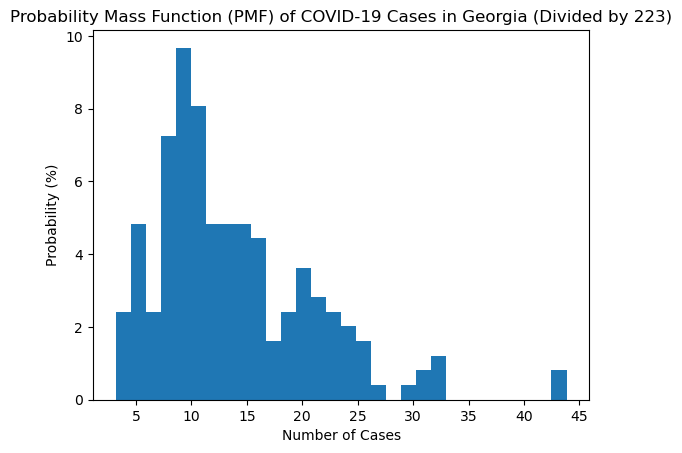

In [2]:
hist, bin_edges = np.histogram(ga_cases / len(ga_cases), bins=30, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

pmf_percent = hist * 100

plt.bar(bin_centers, pmf_percent, width=bin_edges[1] - bin_edges[0], align='center')
plt.xlabel('Number of Cases')
plt.ylabel('Probability (%)')
plt.title('Probability Mass Function (PMF) of COVID-19 Cases in Georgia (Divided by 223)')
plt.show()

In [3]:
description = describe(ga_cases)

# Extract specific properties from the description object, including moments of distribution
mean = description.mean
variance = description.variance
skewness = description.skewness
kurtosis = description.kurtosis
print("Mean:", mean)
print("Skewness:", skewness)
print("Variance:", variance)
stdev = np.sqrt(variance)
print("Standard Deviation:", stdev)
print("Kurtosis:", kurtosis)

Mean: 2534.27868852459
Skewness: 1.286714663846415
Variance: 1763817.2680598092
Standard Deviation: 1328.0878239257406
Kurtosis: 2.224197069713113


The mean of the cases shows us that on average, the state of Georgia had 2534 new cases every day in our data range.

The skewness is positive, at 1.2. This is easily visible by the long tail to the right of our distribution in the chart, indicating the majority of the time the number of cases was lower, but there were some days when there were an extreme number of cases.

The variance is very high, at around 1,763,817. This indicates that the data is spread out over a wide range of values, which is not surprising, but it's a bit too big to be useful. I calculated the standard deviation, which indicates that a large amount of values in the dataset will fall between the interval defined by 1328 cases from the mean.

A kurtosis of 2 tells us that we have a very pronounced peak in comparison to a normal distribution, and a lower amount of data in the tails in comparison to a normal distribution. This means it is "leptokurtic."

## Describe the type of distribution (modality) and its statistics (moments of a distribution - center, variance, skewness, kurtosis) in the report and the notebook.

For this distribution, I would describe it as a __UNIMODAL, RIGHT-SKEWED, LEPTOKURTIC__ distribution, with a significant amount of variance. The specifics of these answers are listed above.

## Compare the distribution and its statistics to 5 other states of your choosing. Describe if the distributions look different and what does that imply.

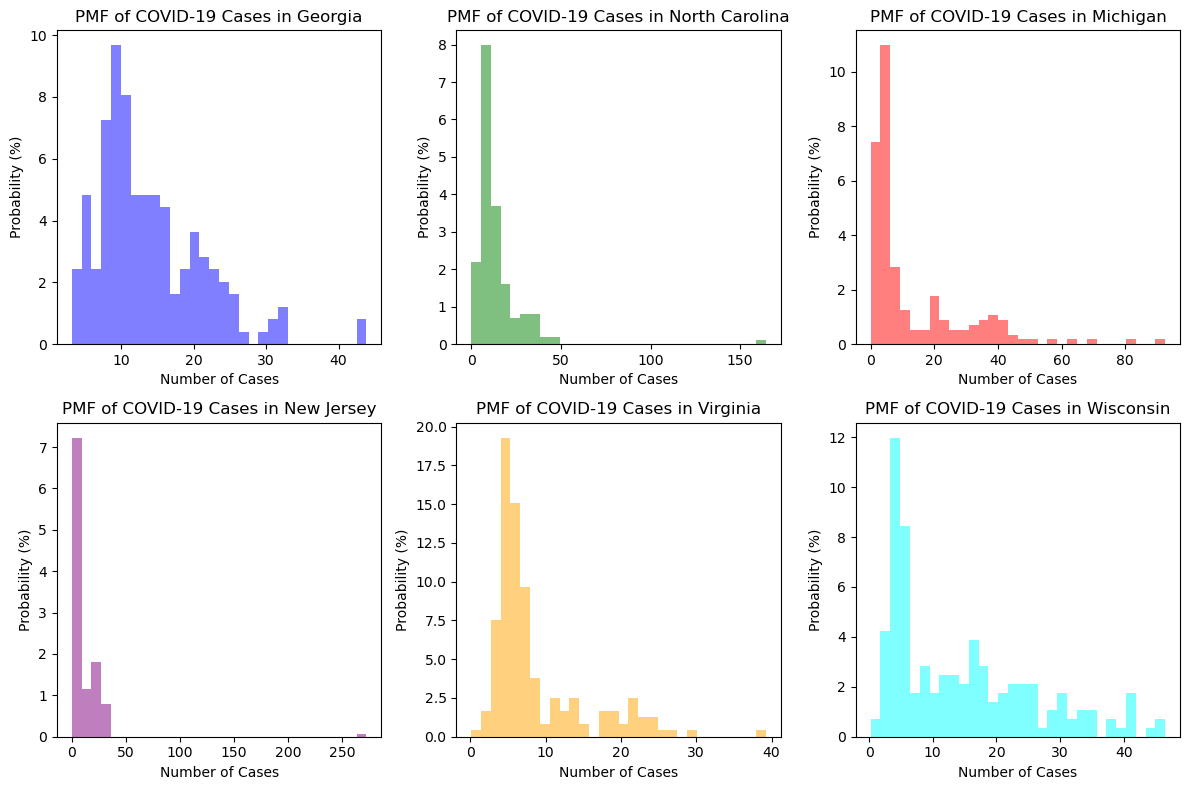

In [4]:
plt.figure(figsize=(12, 8))

state_data = [
    ("Georgia", ga_cases, 'blue'),
    ("North Carolina", nc_cases, 'green'),
    ("Michigan", mi_cases, 'red'),
    ("New Jersey", nj_cases, 'purple'),
    ("Virginia", va_cases, 'orange'),
    ("Wisconsin", wi_cases, 'cyan')
]

for i, (state_name, cases_array, color) in enumerate(state_data, 1):
    hist, bin_edges = np.histogram(cases_array / len(cases_array), bins=30, density=True)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    pmf_percent = hist * 100

    plt.subplot(2, 3, i)
    plt.bar(bin_centers, pmf_percent, width=bin_edges[1] - bin_edges[0], color=color, alpha=0.5, align='center')
    plt.title(f'PMF of COVID-19 Cases in {state_name}')
    plt.xlabel('Number of Cases')
    plt.ylabel('Probability (%)')

plt.tight_layout()
plt.show()

The distributions of cases for the 6 states are very similar. They are all unimodal, right skewed and leptokurtic. The main differences between them is the degree of kurtosis. The cases in Georgia and Wisconsin are closer to normal, while in places like Michigan, NC, Virginia, and especially New Jersey, extreme high outliers are present, but uncommon enough that they make the tail of the chart very thin.

# Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states. Describe how the poission modeling is different from the first modeling you did.

In [5]:
# this is data from the last stage of the project.
population =  pd.read_csv("Data/population.csv")

population

,nc_pop,ga_pop,wi_pop,mi_pop,nj_pop,va_pop
0,10488084,10617423,5822434,9986857,8882190,8535519


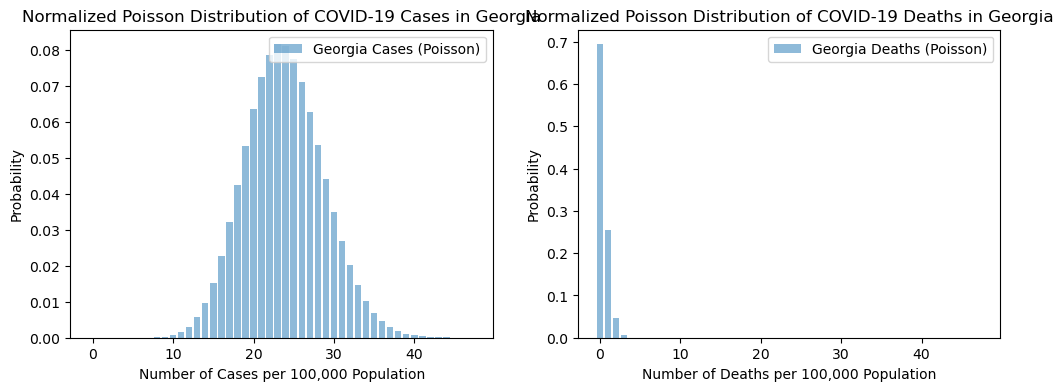

In [30]:
population = 10617423
state = "Georgia"

# normalize the average cases and deaths per 100,000 population
average_cases_normalized = (ga_cases.mean() / population) * 100000
average_deaths_normalized = (ga_deaths.mean() / population) * 100000

# array of values for the Poisson distribution
x = np.arange(0, int(2 * average_cases_normalized) + 1)

# calculate the Poisson probability mass function for cases and deaths
pmf_cases = poisson.pmf(x, average_cases_normalized)
pmf_deaths = poisson.pmf(x, average_deaths_normalized)

# plot cases
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(x, pmf_cases, align='center', alpha=0.5, label=f'{state} Cases (Poisson)')
plt.xlabel('Number of Cases per 100,000 Population')
plt.ylabel('Probability')
plt.title(f'Normalized Poisson Distribution of COVID-19 Cases in {state}')
plt.legend()

# plot deaths
plt.subplot(1, 2, 2)
plt.bar(x, pmf_deaths, align='center', alpha=0.5, label=f'{state} Deaths (Poisson)')
plt.xlabel('Number of Deaths per 100,000 Population')
plt.ylabel('Probability')
plt.title(f'Normalized Poisson Distribution of COVID-19 Deaths in {state}')
plt.legend()

plt.show()

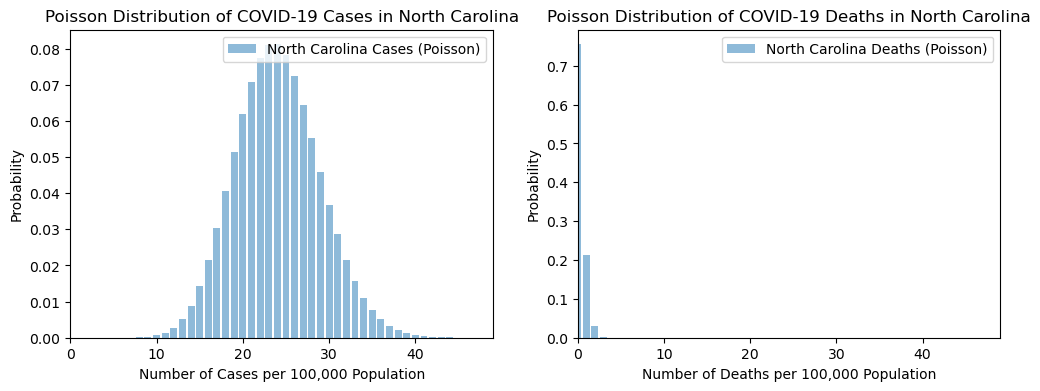

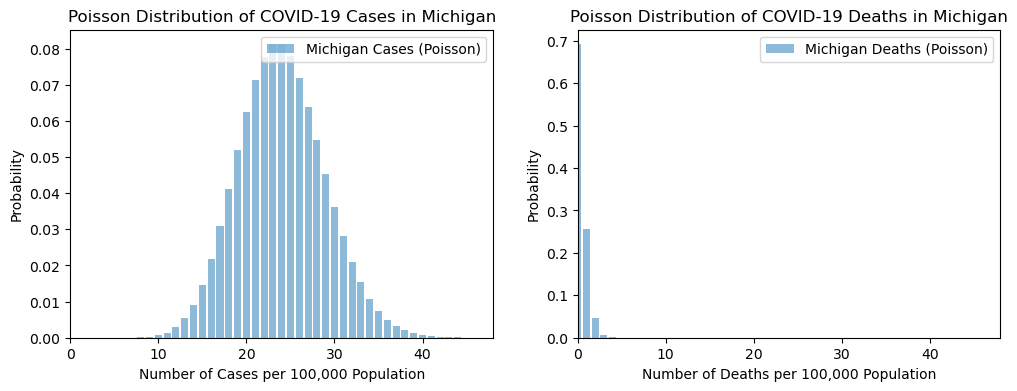

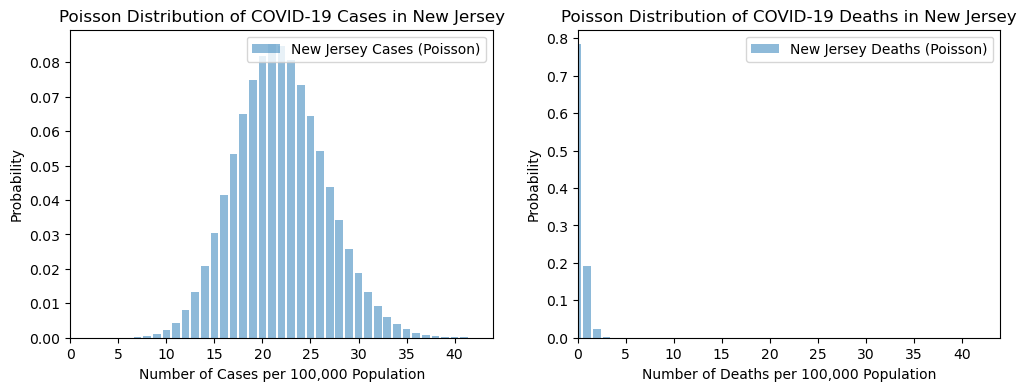

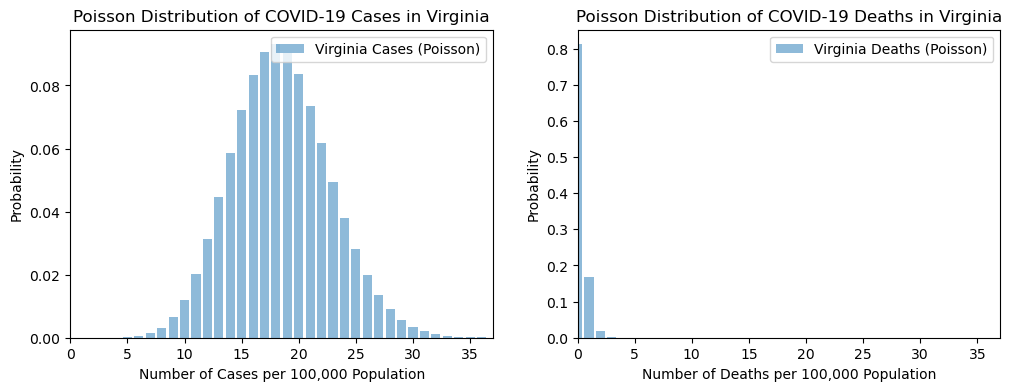

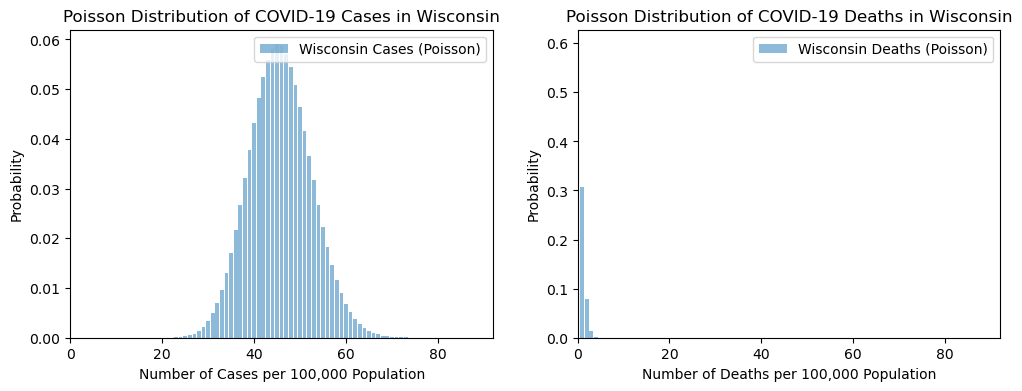

In [7]:
# basically the same as above, but we're using loops to do a lot of them at once.
states_population = {
    'North Carolina': 10488084,
    'Georgia': 10617423,
    'Wisconsin': 5822434,
    'Michigan': 9986857,
    'New Jersey': 8882190,
    'Virginia': 8535519
}

other_states = ['North Carolina', 'Michigan', 'New Jersey', 'Virginia', 'Wisconsin']

for other_state in other_states:
    population = states_population.get(other_state)

    average_cases_normalized = (np.mean(nc_cases) / population) * 100000 if other_state == 'North Carolina' else \
                             (np.mean(ga_cases) / population) * 100000 if other_state == 'Georgia' else \
                             (np.mean(wi_cases) / population) * 100000 if other_state == 'Wisconsin' else \
                             (np.mean(mi_cases) / population) * 100000 if other_state == 'Michigan' else \
                             (np.mean(nj_cases) / population) * 100000 if other_state == 'New Jersey' else \
                             (np.mean(va_cases) / population) * 100000 

    average_deaths_normalized = (np.mean(nc_deaths) / population) * 100000 if other_state == 'North Carolina' else \
                              (np.mean(ga_deaths) / population) * 100000 if other_state == 'Georgia' else \
                              (np.mean(wi_deaths) / population) * 100000 if other_state == 'Wisconsin' else \
                              (np.mean(mi_deaths) / population) * 100000 if other_state == 'Michigan' else \
                              (np.mean(nj_deaths) / population) * 100000 if other_state == 'New Jersey' else \
                              (np.mean(va_deaths) / population) * 100000

    x_range_other = int(2 * average_cases_normalized) + 1

    x = np.arange(0, int(2 * average_cases_normalized) + 1)

    pmf_other_cases = poisson.pmf(x, average_cases_normalized)
    pmf_other_deaths = poisson.pmf(x, average_deaths_normalized)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.bar(x, pmf_other_cases, align='center', alpha=0.5, label=f'{other_state} Cases (Poisson)')
    plt.xlabel('Number of Cases per 100,000 Population')
    plt.ylabel('Probability')
    plt.title(f'Poisson Distribution of COVID-19 Cases in {other_state}')
    plt.xlim(0, x_range_other)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.bar(x, pmf_other_deaths, align='center', alpha=0.5, label=f'{other_state} Deaths (Poisson)')
    plt.xlabel('Number of Deaths per 100,000 Population')
    plt.ylabel('Probability')
    plt.title(f'Poisson Distribution of COVID-19 Deaths in {other_state}')
    plt.xlim(0, x_range_other)
    plt.legend()

plt.show()

You can see that all of the poisson distributions for case data seem to follow the same trend, in that they are all relatively symmetric, and have a shape very similar to normal, in comparison to the regular PMF which was heavily skewed. In contrast, the poisson distribution for deaths looks like it might be symmetrical about the y-axis, if it were possible to have a negative number of deaths. When you see a poisson distribution with this shape, you can see that deaths are relatively infrequent in comparison to cases.

This follows the general logic of what we know about the differences between poisson and regular PMF's. The poisson distribution counts the likelihood of an event occurring in a period of time, and in our case, the probability for a number of successes. 

# Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns. (20 points)

## You can compare either within your chosen specific state or among different states with the different enrichment variables. Within the state you can compare the county based covid data to enrichment data for correlation. Between states you would need to aggregate to state level data and then perform correlation. Both covid and enrichment data will need to be normalized for population. For number of covid cases you can use a measure of center value (median or mean) to compare the number of cases.

I will be using the employment dataset that I experimented with in Stage 1, as well as the data about the election in 2020 as well as US census data about the income of areas in the USA.

In [8]:
dfemploy = pd.read_csv("Data/EmploymentDatasetCtntl.csv")

dfemploy.head(5)

C:\Users\Billy\AppData\Local\Temp\ipykernel_5012\3500741788.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfemploy = pd.read_csv("Data/EmploymentDatasetCtntl.csv")


,Area_Code,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,...,Industry,Status Code,Establishment Count,January Employment,February Employment,March Employment,Total Quarterly Wages,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,US000,US,0.0,0,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,"11,883,196","150,176,434","150,957,408","151,418,052","2,873,835,484,925","1,465",1.0,1.0
1,US000,US,0.0,1,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,"60,862","2,864,978","2,878,828","2,883,282","69,903,511,841","1,870",1.0,1.0
2,US000,US,0.0,2,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,"71,582","4,524,712","4,616,278","4,635,444","87,116,336,812","1,459",1.0,1.0
3,US000,US,0.0,3,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,"171,871","14,247,053","14,368,698","14,432,079","222,765,651,053","1,194",1.0,1.0
4,US000,US,0.0,5,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,"11,578,881","128,539,691","129,093,604","129,467,247","2,494,049,985,219","1,487",1.0,1.0


This dataframe contains both elements of the employment dataset as well as the data about covid cases and deaths. The instructions say to compare the amount of cases to the enrichment variables, so in this case, the employment dataset has data on the states' employment numbers in the first three months in 2023, so to compare them to the state's cases we'll need to create new arrays and compare them.

In [9]:
state_names = ['Georgia', 'North Carolina', 'Michigan', 'New Jersey', 'Virginia', 'Wisconsin']

state_arrays = {}

for state_name in state_names:
    mask = (dfemploy['Area Type'] == 'State') & (dfemploy['St Name'] == state_name) & (dfemploy['Ownership'] == 'Total Covered')
    row = dfemploy[mask]

    if not row.empty:
        # extract the employment data for January, February, and March
        january_data_str = row['January Employment'].values[0]
        february_data_str = row['February Employment'].values[0]
        march_data_str = row['March Employment'].values[0]

        # clean out commas and convert to integers
        january_data = int(january_data_str.replace(',', ''))
        february_data = int(february_data_str.replace(',', ''))
        march_data = int(march_data_str.replace(',', ''))

        # numpy array for the state
        state_array = np.array([january_data, february_data, march_data], dtype=int)

        # array is stored in a dictionary
        state_arrays[f'{state_name.lower()}_emp'] = state_array

# renaming the arrays because I'll be typing them a lot.
ga_emp = state_arrays['georgia_emp']
nc_emp = state_arrays['north carolina_emp']
mi_emp = state_arrays['michigan_emp']
nj_emp = state_arrays['new jersey_emp']
va_emp = state_arrays['virginia_emp']
wi_emp = state_arrays['wisconsin_emp']

# recording the values for each state's population as well, we'll be using this a lot too
ga_pop = 10912876
nc_pop = 10698973
mi_pop = 10034113
nj_pop = 9261699
va_pop = 8683619
wi_pop = 5892539

# convert the integer to a NumPy array of the same shape as ga_emp so they can be easily divided
# there is probably an easier way to do this but, hey it works.
population_array = np.full_like(ga_emp, ga_pop)
ga_emp = ga_emp / population_array
population_array = np.full_like(nc_emp, nc_pop)
nc_emp = nc_emp / population_array
population_array = np.full_like(mi_emp, mi_pop)
mi_emp = mi_emp / population_array
population_array = np.full_like(nj_emp, nj_pop)
nj_emp = nj_emp / population_array
population_array = np.full_like(va_emp, va_pop)
va_emp = va_emp / population_array
population_array = np.full_like(wi_emp, wi_pop)
wi_emp = wi_emp / population_array

# Check the data.
print("Georgia Employment: ", ga_emp)
print("NC Employment: ", nc_emp)
print("Michigan Employment: ", mi_emp)
print("NJ Employment: ", nj_emp)
print("Virginia Employment: ", va_emp)
print("Wisconsin Employment: ", wi_emp)

Georgia Employment:  [0.43432767 0.43684488 0.43761012]
NC Employment:  [0.44275876 0.44556034 0.44702328]
Michigan Employment:  [0.42572482 0.4274332  0.42912004]
NJ Employment:  [0.44581021 0.44733887 0.45016309]
Virginia Employment:  [0.4569141  0.4599269  0.46088123]
Wisconsin Employment:  [0.48470515 0.48610675 0.48779244]


Now that we have data concerning employment at 3 different months, we can create an array of case data to compare it to. I'll be reusing the merged version from stage 1 again.

In [10]:
df = pd.read_csv("Data/ProjectDataStage1WIDEFORMAT.csv")

In [11]:
# Dropping unnecessary columns
columns_to_keep = [col for col in df.columns if 'Cases' in col or col == 'County Name' or col == 'State']
cases_df = df[columns_to_keep]

cases_df.head()

,County Name,State,2020-01-22_Cases,2020-01-23_Cases,2020-01-24_Cases,2020-01-25_Cases,2020-01-26_Cases,2020-01-27_Cases,2020-01-28_Cases,2020-01-29_Cases,...,2023-07-14_Cases,2023-07-15_Cases,2023-07-16_Cases,2023-07-17_Cases,2023-07-18_Cases,2023-07-19_Cases,2023-07-20_Cases,2023-07-21_Cases,2023-07-22_Cases,2023-07-23_Cases
0,Statewide Unallocated,AL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Autauga County,AL,0,0,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,Baldwin County,AL,0,0,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,Barbour County,AL,0,0,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,Bibb County,AL,0,0,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


In [12]:
# splitting into state specific dataframes
ga_cases_df = cases_df[cases_df['State'] == 'GA']
nc_cases_df = cases_df[cases_df['State'] == 'NC']
mi_cases_df = cases_df[cases_df['State'] == 'MI']
nj_cases_df = cases_df[cases_df['State'] == 'NJ']
va_cases_df = cases_df[cases_df['State'] == 'VA']
wi_cases_df = cases_df[cases_df['State'] == 'WI']

state_dfs = {
    'ga': ga_cases_df,
    'nc': nc_cases_df,
    'mi': mi_cases_df,
    'nj': nj_cases_df,
    'va': va_cases_df,
    'wi': wi_cases_df
}

# finding cumulative value of all counties
for state, df in state_dfs.items():
    state_array = df.filter(like='_Cases').sum(axis=0).to_numpy(dtype=np.int64)
    state_arrays[f'{state}_array'] = state_array
    

def convert_to_incremental(data):
    # Calculate the differences between consecutive elements
    incremental_data = np.diff(data, prepend=0)
    return incremental_data

# now that they are arrays we can easily find incremental instead of cumulative data
ga_data = convert_to_incremental(state_arrays['ga_array'])
nc_data = convert_to_incremental(state_arrays['nc_array'])
mi_data = convert_to_incremental(state_arrays['mi_array'])
nj_data = convert_to_incremental(state_arrays['nj_array'])
va_data = convert_to_incremental(state_arrays['va_array'])
wi_data = convert_to_incremental(state_arrays['wi_array'])

# setting a date range
start_date = '2020-01-22'
date_range = pd.date_range(start=start_date, periods=len(ga_data), freq='D')

data = {
    'Date': date_range,
    'GA': ga_data,
    'NC': nc_data,
    'MI': mi_data,
    'NJ': nj_data,
    'VA': va_data,
    'WI': wi_data,
}

sum_cases = pd.DataFrame(data)

#  converting dates to strings so we can search them for substrings
sum_cases['Date'] = sum_cases['Date'].astype(str)

sum_cases = sum_cases.transpose()

sum_cases.columns = sum_cases.columns.astype(str)
sum_cases.head(8)

,0,1,2,3,4,5,6,7,8,9,...,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264
Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2023-06-30,2023-07-01,2023-07-02,2023-07-03,2023-07-04,2023-07-05,2023-07-06,2023-07-07,2023-07-08,2023-07-09
GA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
NC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1075,0,0,0,0,0
NJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1454,0,4,0,0,0
WI,0,0,0,0,0,0,0,0,0,0,...,83,124,44,42,108,112,94,0,0,0


In [13]:
# lets bump of the row containing the dates so they can be the index of the df columns
sum_cases.columns = sum_cases.iloc[0]
sum_cases = sum_cases[1:]

sum_cases.head(8)

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2023-06-30,2023-07-01,2023-07-02,2023-07-03,2023-07-04,2023-07-05,2023-07-06,2023-07-07,2023-07-08,2023-07-09
GA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
NC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1075,0,0,0,0,0
NJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1454,0,4,0,0,0
WI,0,0,0,0,0,0,0,0,0,0,...,83,124,44,42,108,112,94,0,0,0


In [14]:
# finding the mean case value of the months that correspond to our employment data ranges, and normalizing 
# them by population
jan_mean = (sum_cases.loc['GA'][sum_cases.columns.str.contains('2023-01')].mean())/ga_pop
feb_mean = (sum_cases.loc['GA'][sum_cases.columns.str.contains('2023-02')].mean())/ga_pop
mar_mean = (sum_cases.loc['GA'][sum_cases.columns.str.contains('2023-03')].mean())/ga_pop
q1_ga_means = np.array([jan_mean, feb_mean, mar_mean])
np.set_printoptions(suppress=True)  # suppress scientific notation
print(q1_ga_means)

[0.0000833  0.00005875 0.00003088]


In [15]:
jan_mean = (sum_cases.loc['NC'][sum_cases.columns.str.contains('2023-01')].mean())/nc_pop
feb_mean = (sum_cases.loc['NC'][sum_cases.columns.str.contains('2023-02')].mean())/nc_pop
mar_mean = (sum_cases.loc['NC'][sum_cases.columns.str.contains('2023-03')].mean())/nc_pop
q1_nc_means = np.array([jan_mean, feb_mean, mar_mean])
print(q1_nc_means)
jan_mean = (sum_cases.loc['MI'][sum_cases.columns.str.contains('2023-01')].mean())/mi_pop
feb_mean = (sum_cases.loc['MI'][sum_cases.columns.str.contains('2023-02')].mean())/mi_pop
mar_mean = (sum_cases.loc['MI'][sum_cases.columns.str.contains('2023-03')].mean())/mi_pop
q1_mi_means = np.array([jan_mean, feb_mean, mar_mean])
print(q1_mi_means)
jan_mean = (sum_cases.loc['NJ'][sum_cases.columns.str.contains('2023-01')].mean())/nj_pop
feb_mean = (sum_cases.loc['NJ'][sum_cases.columns.str.contains('2023-02')].mean())/nj_pop
mar_mean = (sum_cases.loc['NJ'][sum_cases.columns.str.contains('2023-03')].mean())/nj_pop
q1_nj_means = np.array([jan_mean, feb_mean, mar_mean])
print(q1_nj_means)
jan_mean = (sum_cases.loc['VA'][sum_cases.columns.str.contains('2023-01')].mean())/va_pop
feb_mean = (sum_cases.loc['VA'][sum_cases.columns.str.contains('2023-02')].mean())/va_pop
mar_mean = (sum_cases.loc['VA'][sum_cases.columns.str.contains('2023-03')].mean())/va_pop
q1_va_means = np.array([jan_mean, feb_mean, mar_mean])
print(q1_va_means)
jan_mean = (sum_cases.loc['WI'][sum_cases.columns.str.contains('2023-01')].mean())/wi_pop
feb_mean = (sum_cases.loc['WI'][sum_cases.columns.str.contains('2023-02')].mean())/wi_pop
mar_mean = (sum_cases.loc['WI'][sum_cases.columns.str.contains('2023-03')].mean())/wi_pop
q1_wi_means = np.array([jan_mean, feb_mean, mar_mean])
print(q1_wi_means)

[0.00028283 0.00015413 0.00007697]
[0.00013325 0.00009313 0.00008539]
[0.00031475 0.0000267  0.00000014]
[0.00022751 0.00010932 0.0000465 ]
[0.00012341 0.00010589 0.00004869]


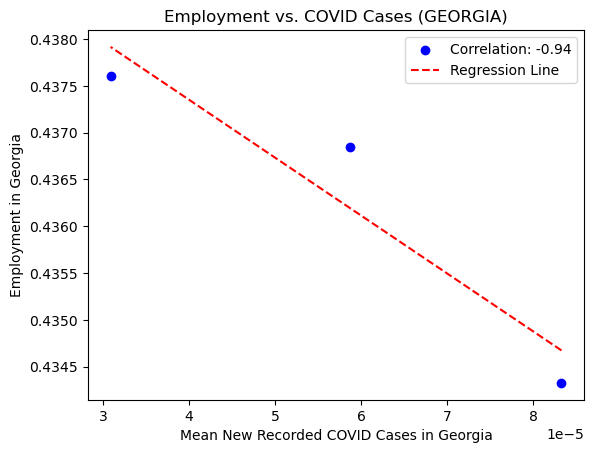

In [16]:
corr_coefficient = np.corrcoef(q1_ga_means, ga_emp)[0, 1]

slope, intercept, r_value, p_value, std_err = linregress(q1_ga_means, ga_emp)
line = slope * q1_ga_means + intercept

plt.scatter(q1_ga_means, ga_emp, label=f'Correlation: {corr_coefficient:.2f}', color='blue')

plt.plot(q1_ga_means, line, color='red', linestyle='--', label='Regression Line')

plt.xlabel('Mean New Recorded COVID Cases in Georgia')
plt.ylabel('Employment in Georgia')
plt.title('Employment vs. COVID Cases (GEORGIA)')

plt.legend()

plt.show()

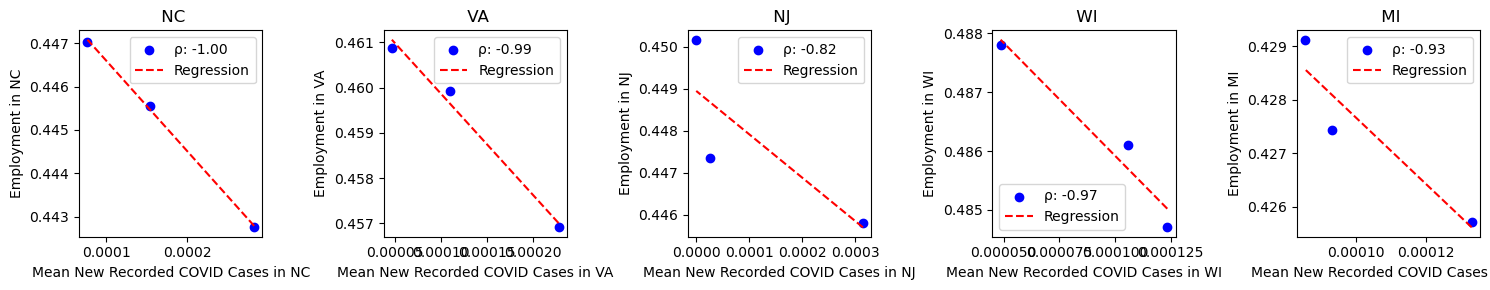

In [17]:
states = ['nc', 'va', 'nj', 'wi', 'mi']

fig, axes = plt.subplots(1, len(states), figsize=(15, 3))
for i, state in enumerate(states):
    code = f'q1_{state}_means'
    emp = f'{state}_emp'

    corr_coefficient = np.corrcoef(locals()[code], locals()[emp])[0, 1]

    slope, intercept, r_value, p_value, std_err = linregress(locals()[code], locals()[emp])
    line = slope * locals()[code] + intercept

    axes[i].scatter(locals()[code], locals()[emp], label=f'ρ: {corr_coefficient:.2f}', color='blue')

    axes[i].plot(locals()[code], line, color='red', linestyle='--', label='Regression')

    axes[i].set_xlabel(f'Mean New Recorded COVID Cases in {state.upper()}')
    axes[i].set_ylabel(f'Employment in {state.upper()}')
    axes[i].set_title(f' {state.upper()}')

    axes[i].legend()


plt.tight_layout()
plt.show()

You can see that, in all cases, there is a relatively strong negative correlation between the employment rate and the average amount of new COVID cases in a month. Our dataset is not very robust however because it only contains three different data points for each state. If we were to draw a conclusion from what we found, I would say that there is evidence to believe that an increase in cases is correlated with a decrease in employment, and vice-versa. If I would speculate about the cause, perhaps they may not be directly affecting one another, but instead, employers may be more willing to hire new employees when there is not as much of a concern about spreading COVID.

In [18]:
# loading the csv containing election data
electiondf = pd.read_csv("Data/president_county_candidate.csv")
electiondf.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


We can see in this dataset that results are listed by county, and the amount of votes presidential candidates recieved from that county are detailed. Due to the US's voting system, no party other than the biggest two ever have any chance of winning, so I'll only be counting those in my totals. 

In [19]:
states_to_keep = ['North Carolina', 'Virginia', 'New Jersey', 'Wisconsin', 'Michigan', 'Georgia']
parties_to_keep = ['REP', 'DEM']

electiondf = electiondf[(electiondf['state'].isin(states_to_keep)) & (electiondf['party'].isin(parties_to_keep))]

electiondf.head(10)

,state,county,candidate,party,total_votes,won
593,Georgia,Appling County,Donald Trump,REP,6570,True
594,Georgia,Appling County,Joe Biden,DEM,1784,False
597,Georgia,Atkinson County,Donald Trump,REP,2300,True
598,Georgia,Atkinson County,Joe Biden,DEM,825,False
601,Georgia,Bacon County,Donald Trump,REP,4017,True
602,Georgia,Bacon County,Joe Biden,DEM,625,False
605,Georgia,Baker County,Donald Trump,REP,897,True
606,Georgia,Baker County,Joe Biden,DEM,652,False
609,Georgia,Baldwin County,Joe Biden,DEM,9140,True
610,Georgia,Baldwin County,Donald Trump,REP,8903,False


Now to find the proportion of voters that voted for each party.

In [20]:
sums_dict = {}

for state in states_to_keep:
    for party in parties_to_keep:
        key = f'{state} {party}'
        
        total_votes_sum = electiondf[(electiondf['state'] == state) & (electiondf['party'] == party)]['total_votes'].sum()
        
        sums_dict[key] = total_votes_sum

print(sums_dict)

{'North Carolina REP': 2758773, 'North Carolina DEM': 2684292, 'Virginia REP': 1962430, 'Virginia DEM': 2413568, 'New Jersey REP': 1883274, 'New Jersey DEM': 2608335, 'Wisconsin REP': 1610065, 'Wisconsin DEM': 1630673, 'Michigan REP': 2649852, 'Michigan DEM': 2804040, 'Georgia REP': 2461854, 'Georgia DEM': 2473633}


Now we find what percentage of people voted for each party in each state voted for the Republican party, as a percentage of total voters (that voted for either Republican or Democrat)

In [21]:
ga_vote = sums_dict['Georgia REP']/(sums_dict['Georgia REP']+sums_dict['Georgia DEM'])
nc_vote = sums_dict['North Carolina REP']/(sums_dict['North Carolina REP']+sums_dict['North Carolina DEM'])
va_vote = sums_dict['Virginia REP']/(sums_dict['Virginia REP']+sums_dict['Virginia DEM'])
nj_vote = sums_dict['New Jersey REP']/(sums_dict['New Jersey REP']+sums_dict['New Jersey DEM'])
wi_vote = sums_dict['Wisconsin REP']/(sums_dict['Wisconsin REP']+sums_dict['Wisconsin DEM'])
mi_vote = sums_dict['Michigan REP']/(sums_dict['Michigan REP']+sums_dict['Michigan DEM'])

print('The percent of people in Georgia that voted Republican is: ',f"{ga_vote * 100:.2f}%")

The percent of people in Georgia that voted Republican is:  49.88%


Now we need to create an array that contains the mean case value of these states to compare to.

In [22]:
row_means = sum_cases.mean(axis=1) # this is the sum_cases array from earlier

row_means_df = pd.DataFrame({'State': sum_cases.index, 'Row_Mean': row_means})

row_means_df.loc['GA', 'Row_Mean'] /= ga_pop #normalizing by population
row_means_df.loc['NC', 'Row_Mean'] /= nc_pop
row_means_df.loc['MI', 'Row_Mean'] /= mi_pop
row_means_df.loc['NJ', 'Row_Mean'] /= nj_pop
row_means_df.loc['VA', 'Row_Mean'] /= va_pop
row_means_df.loc['WI', 'Row_Mean'] /= wi_pop

print(row_means_df)

   State  Row_Mean
GA    GA  0.000164
NC    NC  0.000254
MI    MI  0.000242
NJ    NJ  0.000256
VA    VA  0.000211
WI    WI  0.000274


In [23]:
# convert row_mean column to a np array for easy comparison
row_mean_array = row_means_df['Row_Mean'].to_numpy()
republican_votes = np.array([ga_vote, nc_vote, mi_vote, nj_vote, va_vote, wi_vote])

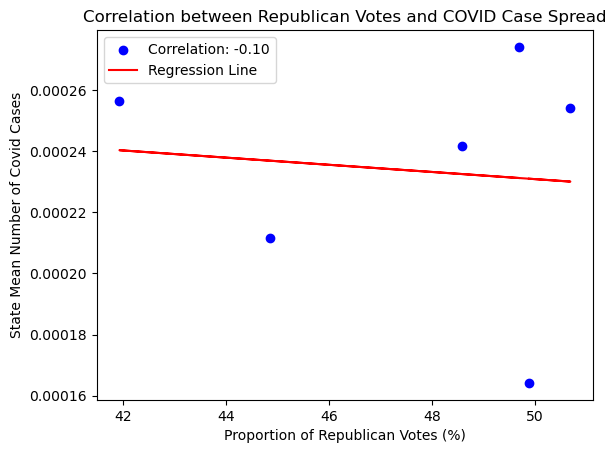

In [24]:
republican_votes_percent = republican_votes * 100

corr_coefficient = np.corrcoef(republican_votes_percent, row_mean_array)[0, 1]

slope, intercept, r_value, p_value, std_err = linregress(republican_votes_percent, row_mean_array)
line = slope * republican_votes_percent + intercept

plt.scatter(republican_votes_percent, row_mean_array, label=f'Correlation: {corr_coefficient:.2f}', color='blue')

plt.plot(republican_votes_percent, line, color='red', linestyle='-', label='Regression Line')

plt.xlabel('Proportion of Republican Votes (%)')
plt.ylabel('State Mean Number of Covid Cases')
plt.title('Correlation between Republican Votes and COVID Case Spread')

plt.legend()

plt.show()

As one can see, there is a weak negative correlation between the two data points among the six states I observed. This is too weak to really be of any practical use, but if one would insist on drawing conclusions based on this data, I would say that this means that the more Republican voters a state has, the more likely they are to have a higher number of COVID cases. But realistically, this is an almost horizontal line of correlation, and I would be more confident in saying that if anything, this implies that there is no meaningful relationship, or that there is too much variance in the dataset.

In [25]:
# importing the economic census data
econdf = pd.read_csv("Data/economic.csv")

econdf.head(5)

,Label (Grouping),Georgia!!Estimate,Georgia!!Margin of Error,Georgia!!Percent,Georgia!!Percent Margin of Error,Michigan!!Estimate,Michigan!!Margin of Error,Michigan!!Percent,Michigan!!Percent Margin of Error,New Jersey!!Estimate,...,North Carolina!!Percent,North Carolina!!Percent Margin of Error,Virginia!!Estimate,Virginia!!Margin of Error,Virginia!!Percent,Virginia!!Percent Margin of Error,Wisconsin!!Estimate,Wisconsin!!Margin of Error,Wisconsin!!Percent,Wisconsin!!Percent Margin of Error
0,EMPLOYMENT STATUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Population 16 years and over,"8,708,310","±8,015","8,708,310",(X),"8,179,427","±5,182","8,179,427",(X),"7,510,983",...,"8,671,939",(X),"7,041,278","±5,566","7,041,278",(X),"4,802,830","±3,684","4,802,830",(X)
2,In labor force,"5,562,669","±23,100",63.9%,±0.3,"5,039,051","±20,467",61.6%,±0.2,"4,971,726",...,62.8%,±0.3,"4,600,045","±19,805",65.3%,±0.3,"3,127,697","±13,857",65.1%,±0.3
3,Civilian labor force,"5,502,894","±23,833",63.2%,±0.3,"5,034,322","±20,783",61.5%,±0.2,"4,957,313",...,61.5%,±0.3,"4,459,666","±20,299",63.3%,±0.3,"3,123,424","±13,919",65.0%,±0.3
4,Employed,"5,273,176","±24,730",60.6%,±0.3,"4,800,228","±21,607",58.7%,±0.3,"4,707,790",...,59.2%,±0.3,"4,298,561","±21,090",61.0%,±0.3,"3,036,963","±15,083",63.2%,±0.3


In [26]:
# This dataframe is a bit of a mess so we're just going to search by index to find the row that we want.
value = econdf.loc[68, 'Label (Grouping)']
print(value)

        Mean household income (dollars)


In [27]:
# Now that we know that our interesting data is all in row 68, we can get to extracting the data.
# We'll need to reformat the data so it will play nice with our other int array.
ga_income = int(econdf.loc[68, 'Georgia!!Estimate'].replace(',', ''))
nc_income = int(econdf.loc[68, 'North Carolina!!Estimate'].replace(',', ''))
mi_income = int(econdf.loc[68, 'Michigan!!Estimate'].replace(',', ''))
nj_income = int(econdf.loc[68, 'New Jersey!!Estimate'].replace(',', ''))
va_income = int(econdf.loc[68, 'Virginia!!Estimate'].replace(',', ''))
wi_income = int(econdf.loc[68, 'Wisconsin!!Estimate'].replace(',', ''))

In [28]:
state_income_norm = np.array([ga_income/ga_pop, nc_income/nc_pop, mi_income/mi_pop, nj_income/nj_pop, 
                         va_income/va_pop, wi_income/wi_pop])
# let's check out the data.

print(state_income_norm)

[0.00915093 0.00881888 0.00915437 0.01448881 0.01371064 0.0159668 ]


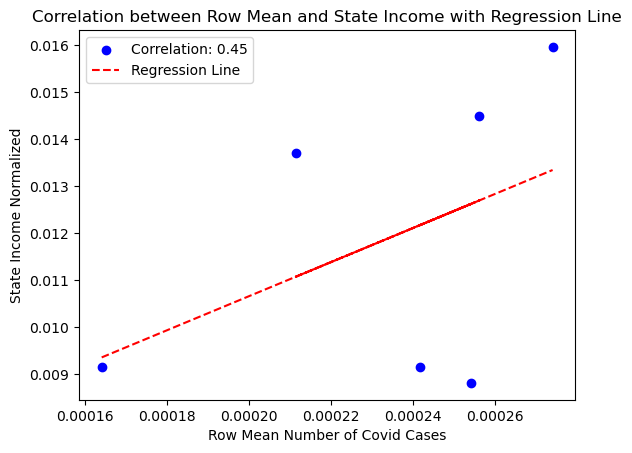

In [29]:
corr_coefficient = np.corrcoef(row_mean_array, state_income_norm)[0, 1]

slope, intercept, r_value, p_value, std_err = linregress(row_mean_array, state_income_norm)
line = slope * row_mean_array + intercept

plt.scatter(row_mean_array, state_income_norm, label=f'Correlation: {corr_coefficient:.2f}', color='blue')

plt.plot(row_mean_array, line, color='red', linestyle='--', label='Regression Line')

plt.xlabel('Row Mean Number of Covid Cases')
plt.ylabel('State Income Normalized')
plt.title('Correlation between Row Mean and State Income with Regression Line')

plt.legend()

plt.show()

As you can see, there is positive correlation here. It is less than one half, so it is weak, but it is more significant than our previous correlation. This implies that, if these statistics are correlated, states with high income are more likely to have a large number of COVID cases. This may be because wealthier people are more likely to travel and become vectors for disease. 

# Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against.

Hypothesis 1. Does an increase in jobs/employment in an area lead to/correlate with an increased number of COVID cases? I had initially suspected yes, on the grounds that people that have excuses to leave their homes and go to work are more likely to pick up diseases at work and bring them home, but the data I found above did not prove this hypothesis. In fact, it seemed to suggest a strong trend in the opposite direction, but my dataset was limited in the sample size, so I would want to get access to a bigger range of data to be confident in this hypothesis.

Hypothesis 2. Is a state with a political leaning to the right more likely to have a high number of COVID cases? I had initially suspected yes, on the grounds that the pandemic was widely politicized and pandemic skepticism was more popular among those who had voted Republican. However, the data I found didn't show a positive correlation that I had expected, but rather a very weak negative one, which is as good as no correlation at all in terms of drawing conclusions.

Hypothesis 3. Is a higher amount of COVID cases negatively correlated with the income/wealth of a population? I had initially suspected yes, on the grounds that it was widely said that poorer people are more vulnerable to COVID, and would therefore be more likely to contract the disease. In hindsight, I suspect that this may only apply to deaths, and not cases. In fact, my calculations show a moderately weak positive correlation with wealth and COVID cases; the richer a state's population is, the more likely they are to have a high number of COVID cases. This makes a sort of sense, as wealthier people are more likely to travel and become vectors of disease, but they may also have the money to survive the illness in a way that poorer people couldn't afford. I suspect that, if I were to measure the correlation between the number of deaths and wealth, it would be more likely to be negative, but that is outside the scope of this assignment.